<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Récupération-des-données-à-partir-de-la-fonction-de-scrapping" data-toc-modified-id="Récupération-des-données-à-partir-de-la-fonction-de-scrapping-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Récupération des données à partir de la fonction de scrapping</a></span></li><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Sélection-des-features" data-toc-modified-id="Sélection-des-features-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sélection des features</a></span><ul class="toc-item"><li><span><a href="#La-multicolinéarité" data-toc-modified-id="La-multicolinéarité-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>La multicolinéarité</a></span></li><li><span><a href="#La-variance" data-toc-modified-id="La-variance-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>La variance</a></span></li><li><span><a href="#Force-de-la-relation-avec-la-target" data-toc-modified-id="Force-de-la-relation-avec-la-target-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Force de la relation avec la target</a></span></li></ul></li><li><span><a href="#Entrainement-et-sélection-du-modèle" data-toc-modified-id="Entrainement-et-sélection-du-modèle-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Entrainement et sélection du modèle</a></span><ul class="toc-item"><li><span><a href="#Fonctions" data-toc-modified-id="Fonctions-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Fonctions</a></span><ul class="toc-item"><li><span><a href="#Fonctions-pour-évaluer-les-performances-du-modèle" data-toc-modified-id="Fonctions-pour-évaluer-les-performances-du-modèle-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>Fonctions pour évaluer les performances du modèle</a></span></li><li><span><a href="#Fonction-une-fois-le-modèle-fitté" data-toc-modified-id="Fonction-une-fois-le-modèle-fitté-4.1.2"><span class="toc-item-num">4.1.2&nbsp;&nbsp;</span>Fonction une fois le modèle fitté</a></span></li></ul></li><li><span><a href="#Linear-Regression" data-toc-modified-id="Linear-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Linear Regression</a></span><ul class="toc-item"><li><span><a href="#Test-statistique-pour-vérifier-qu'il-existe-une-relation-entre-les-features-et-la-target" data-toc-modified-id="Test-statistique-pour-vérifier-qu'il-existe-une-relation-entre-les-features-et-la-target-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>Test statistique pour vérifier qu'il existe une relation entre les features et la target</a></span></li></ul></li><li><span><a href="#Elastic-Net" data-toc-modified-id="Elastic-Net-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Elastic Net</a></span></li><li><span><a href="#Polynomial-regression" data-toc-modified-id="Polynomial-regression-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Polynomial regression</a></span></li><li><span><a href="#SVR" data-toc-modified-id="SVR-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>SVR</a></span></li><li><span><a href="#Comparaison-des-performances-des-modèles" data-toc-modified-id="Comparaison-des-performances-des-modèles-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Comparaison des performances des modèles</a></span></li></ul></li><li><span><a href="#Performance-du-modèle-sélectionné-sur-le-test-set" data-toc-modified-id="Performance-du-modèle-sélectionné-sur-le-test-set-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Performance du modèle sélectionné sur le test set</a></span></li><li><span><a href="#Pricer" data-toc-modified-id="Pricer-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Pricer</a></span></li></ul></div>

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

/Users/estellecampos/Documents/Projets/LeBonCoin/env/lib/python3.9/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Récupération des données à partir de la fonction de scrapping

In [48]:
def get_car_info(marque:str, modele:str):
    """A partir d'une marque (ex:Mercedes) et d'un model (ex:amg-gt), retourne un dataframe contenant les informations collectées sur le site autoscoot24
    Pour chaque instance, les features sont les suivantes : nom (détail donné par le vendeur), kilométrage, prix, promotion en cours, type de carburant, type de transmission, type de vendeur, localisation du vendeur

    Args:
        marque (str): marque du véhicule recherché
        modele (str): modèle du véhicule recherché (doit etre en adéquation avec la marque sinon pas de résultat)
        cf. la nomenclature du site autoscoot24 pour bien définir le couple marque-modèle
    """

    if (type(marque) != str) or (type(modele) != str):
        print("La marque et le modèle du véhicule doivent être indiqués sous format string : entre parenthèse")
        return

    i = 1
    url = f"https://www.autoscout24.fr/lst/{marque}/{modele}?atype=C&cy=D%2CA%2CB%2CE%2CF%2CI%2CL%2CNL&damaged_listing=exclude&desc=0&page={i}&powertype=kw&search_id=29u2akin6i7&sort=standard&source=homepage_search-mask&ustate=N%2CU"
    r = requests.get(url)
    
    if r.status_code == 200:
        soup = BeautifulSoup(r.content, "html.parser")

        # permet de trouver le nombre max de pages [attention : le site autoscoot24 se limite à 20 pages par recherche -> donc max de 400 instances collectées]
        pages = soup.find('div', class_="ListPage_pagination__4Vw9q").text
        number = re.findall(r'\d+', pages.split("/")[1].strip())
        nb_pages = int(number[0])

        nom = []
        prix = []
        promo = []
        list_km = []
        list_transmission = []
        list_carburant = []
        list_date = []
        puissance_ch = []
        location = []
        vendeur = []
        
        for i in range(1, nb_pages+1):
            url = f"https://www.autoscout24.fr/lst/{marque}/{modele}?atype=C&cy=D%2CA%2CB%2CE%2CF%2CI%2CL%2CNL&damaged_listing=exclude&desc=0&page={i}&powertype=kw&search_id=29u2akin6i7&sort=standard&source=homepage_search-mask&ustate=N%2CU"
            r = requests.get(url)
            soup = BeautifulSoup(r.content, "html.parser")
            
            voitures = soup.find_all('div', class_="ListItem_wrapper__TxHWu")            
            for voiture in voitures:
                
                nom.append(voiture.find('span', class_="ListItem_version__5EWfi").text.strip())

                all_price = voiture.find('div', class_="PriceAndSeals_wrapper__BMNaJ").text
                detailed = all_price.split(',')
                if len(detailed) < 3:
                    price = detailed[0].strip('\u202f').strip('€')
                    price = int(''.join(list(map(lambda x: x.strip(), price.split()))))
                    prix.append(price)
                    promo.append(0)
                else:
                    price2 = detailed[1].strip('\u202f').strip('-€')
                    price2 = int(''.join(list(map(lambda x: x.strip(), price2.split()))))
                    prix.append(price2)
                    price1 = int(detailed[0].strip("€").replace(".",""))
                    promo.append(round(((price2-price1)/price1)*100,2))

                detail = voiture.find('div', class_="VehicleDetailTable_container__XhfV1").get_text().replace('km', '')
                new = detail.split(' ')
                
                if new[0] == '-':
                    km = np.nan
                else:
                    km = new[0].strip('\u202f')
                    km = int(''.join(list(map(lambda x: x.strip(), km.split()))))
                list_km.append(km)

                if new[-1] == 'CH)':
                    if new[-2].strip("(").isdigit():
                        ch = int(new[-2].strip("("))
                    else:
                        ch = np.nan
                else:
                    if new[-5].strip("("):
                        ch = int(new[-5].strip("("))
                    else:
                        ch = np.nan
                puissance_ch.append(ch)

                
                if new[1]=="-":
                    transmission = np.nan
                    if new[3].startswith('(A'):
                        date=np.nan
                    else:
                        date = re.findall(r'\d+', new[2])[0] + "/" + re.findall(r'\d+', new[2])[1]
                    if len(re.findall(r'[a-zA-Z]+', new[2]))>2:
                        carburant = "E" + re.findall(r'[a-zA-Z]+', new[2])[1] + "/" + re.findall(r'[a-zA-Z]+', new[2])[2]
                    elif len(re.findall(r'[a-zA-Z]+', new[2]))==2:
                        carburant = re.findall(r'[a-zA-Z]+', new[2])[1]
                    else:
                        carburant = np.nan

                elif new[1]=="Boîte":
                    transmission = new[1] + " " +re.findall(r'[a-zA-Z]+', new[2])[0]
                    if new[3].startswith('(A'):
                        date=np.nan
                    else:
                        date = re.findall(r'\d+', new[2])[0] + "/" + re.findall(r'\d+', new[2])[1]
                    if len(re.findall(r'[a-zA-Z]+', new[2]))>2:
                        carburant = "E" + re.findall(r'[a-zA-Z]+', new[2])[1] + "/" + re.findall(r'[a-zA-Z]+', new[2])[2]
                    elif len(re.findall(r'[a-zA-Z]+', new[2]))==2:
                        carburant = re.findall(r'[a-zA-Z]+', new[2])[1]
                    else:
                        carburant = np.nan

                else:
                    detail_spec = re.findall(r'[a-zA-Z]+', new[1])
                    transmission = detail_spec[0] + '-' + detail_spec[1]
                    carburant = detail_spec[2]
                    date = re.findall(r'\d+', new[1])[0] + "/" + re.findall(r'\d+', new[1])[1]
                list_transmission.append(transmission)
                list_carburant.append(carburant)
                list_date.append(date)
            
            regex =  re.compile("leRMu$|THzvQ$")
            sellers = soup.find_all('span', {"class":regex})
            for seller in sellers:
                address = seller.text
                address_detail = re.split("• |,",address)
                if address_detail[0] == "Particuliers":
                    vendeur.append("Particulier")
                else:
                    vendeur.append("Professionnel")
                if len(address_detail)>1:
                    address_final = address_detail[1]
                else:
                    address_final = address_detail[0]
                country = address_final[:2]
                location.append(country)

        # création du dataframe à partir des données collectées lors du scrapping
        dico_df = {'name':nom, 'kilometrage':list_km, "prix":prix, "promo_%":promo, 'transmission':list_transmission, '1ere_immat':list_date, 'carburant':list_carburant, 'puissance_chv':puissance_ch, 'seller_location':location, 'seller_type':vendeur}
        df = pd.DataFrame(dico_df)
        
        # on récupère seulement l'année de la date d'immatriculation et on supprime la colonne "1ere_imat"
        df["1ere_immat"] = pd.to_datetime(df["1ere_immat"], format='%m/%Y')
        df.insert(4, "immat_year", df["1ere_immat"].dt.year)
        df.drop(['1ere_immat'], axis=1, inplace=True)

        # mise en forme de certaines colonnes
        df[['puissance_chv','immat_year','kilometrage','prix']] = df[['puissance_chv','immat_year','kilometrage','prix']].astype('Int64')

        # corrections manuelles de certaines erreures récurentes liées au scrapping
        df["carburant"] = df["carburant"].replace("Ete/lectrique", "Electrique/Essence")
        df["carburant"] = df["carburant"].replace("Ete/Essence", "Essence")
        df["carburant"] = df["carburant"].replace("Ete/Autres", "Autres")
        df["carburant"] = df["carburant"].replace("lectrique", "Electrique")
        df["carburant"] = df["carburant"].replace("te", "Electrique")
        df["seller_location"] = df["seller_location"].str.strip()
        df.drop(df.loc[df['seller_location'].str.len()==1].index, inplace=True)

        print(f"{len(df)} véhicules correspondant à cette description ont été trouvés")
        print("----------")

        current_year = datetime.date.today().year
        float_formater = '{:,}'.format
        print("Prix moyen:",float_formater(df.prix.mean().round(2)),"€")
        print("Kilometrage moyen:",float_formater(df.kilometrage.mean().round(2)),"km")
        print("Ancienneté moyenne:",float_formater(round(current_year-df.immat_year.mean(),2)),"ans")

        return(df)
    
    else:
        print(f"erreur de connection au site ; error code : {r.status_code}")       

In [3]:
marque = "bmw"
modele = "320"

In [49]:
df = get_car_info(marque,modele)

399 véhicules correspondant à cette description ont été trouvés
----------
Prix moyen: 26,094.9 €
Kilometrage moyen: 96,484.3 km
Ancienneté moyenne: 6.56 ans


In [50]:
df

,name,kilometrage,prix,promo_%,immat_year,transmission,carburant,puissance_chv,seller_location,seller_type
0,i Berline - Automaat,38406,26900,0.00,2019,Boîte automatique,Essence,184.0,BE,Professionnel
1,iA Advantage ** Navi/Carplay | Trekh. | Leder,17908,26990,0.00,2019,Boîte automatique,Essence,184.0,BE,Professionnel
2,320i M Sport Edition High Executive,189559,11950,0.00,2014,Boîte manuelle,Essence,184.0,NL,Professionnel
3,d xDrive M Sport Navi Leder Dr.Ass. Hifi Rfk LED,63500,34890,0.00,2022,Boîte automatique,Diesel,190.0,DE,Professionnel
4,320i 170PK Clima Airco YOUNGTIMER Cruise Stuur...,135424,8999,0.00,2007,Boîte manuelle,Essence,170.0,NL,Professionnel
...,...,...,...,...,...,...,...,...,...,...
395,e Msport auto,26793,41500,-7.57,2022,Boîte automatique,Electrique/Essence,163.0,IT,Professionnel
396,320d xDrive Touring Autom M-Sport+PGD *ab € 42...,6000,43990,0.00,2021,Boîte automatique,Electrique/Diesel,190.0,AT,Professionnel
397,320d,101355,18900,0.00,2017,Boîte automatique,Diesel,190.0,IT,Professionnel
398,320d Touring mhev Msport aut RETROCAM NAVI COC...,94730,36500,0.00,2021,Boîte automatique,Electrique/Diesel,190.0,IT,Professionnel


In [55]:
df["transmission"].value_counts().index.tolist()

['Boîte automatique', 'Boîte manuelle', 'Semi-automatique']

Le scrapper permet de récupérer un certain nombre de données concernant un modèle spécifique de véhicule (défini par sa marque et son modèle).
- on pourrait imaginer un filtre plus fin des informations concernant le véhicule (ex: les finitions), mais cela limiterait d'autant la quantité de données disponible pour entrainer un modèle de ML

A partir de ces données, nous souhaitons crééer un **pricer** qui estimerait la valeur de marché d'un véhicule de ce modèle en fonction d'un certain nombre de paramètres (kilométrage, type de transmission...). Ce pricer serait un outil d'aide à la décision pour un professionel ou un particulier qui souhaiterait vendre un véhicule de ce modèle.

# Feature engineering

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
import matplotlib.image as mpimg
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression

In [7]:
def train_test_preprocess1(df:pd.DataFrame, scaler):
    """Preprocess les données collectées pour pouvoir les utiliser dans des algo de ML
    (1) sépare les features de la target (X et y)
    (2) scinde le dataset en training set et test set
    (3) preprocess les données en fonction de leur type (num ou cat) et de leur nature (gestion des valeurs manquantes différentes)

    Args:
        df (DataFrame): données collectées
        scaler (sklearn.preprocessing): StandardScaler() ou MinMaxScaler()
    Return:
        X_train_scl et X_test_scl = les données du trainig et test set prétraitées
        y_train et y_test = les response variables pour les deux sets
    """

    dfml = df.copy()
    n = len(dfml)

    drop_missing = ['kilometrage', 'seller_location']
    dfml.dropna(subset=drop_missing, inplace=True)
    print(f"Suppression de {n-len(dfml)} véhicules")

    target = 'prix'
    X = dfml.drop(columns=[target, "name"]) #suppression de la variable 'name' qui n'a pas d'interet pour le modèle
    y = dfml[target]

    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1, random_state=12)
    print(f"Training set: {X_train.shape[0]} instances et {X_train.shape[1]} features")
    print(f"Test set: {X_test.shape[0]} instances et {X_train.shape[1]} features")

    cat = X_train.select_dtypes(include=['object']).columns.to_list()
    
    # traitement des missings values différents selon la variable
    num_null_missing = ['promo_%']
    num_median_missing = ['immat_year']
    num_mode_missing = ['puissance_chv']
    num_drop_missing = ['kilometrage']

    for el in num_null_missing:
        if el not in X_train.columns:
            num_null_missing.remove(el)

    for el in num_median_missing:
        if el not in X_train.columns:
            num_median_missing.remove(el)

    for el in num_mode_missing:
        if el not in X_train.columns:
            num_mode_missing.remove(el)

    for el in num_drop_missing:
        if el not in X_train.columns:
            num_drop_missing.remove(el)
    
    # les variables numériques ont des unités de mesure différentes (km, euros, chv, années) et certaines features ont des valeurs très élevées (ex:km) et pourraient supplenter les autres dans le modèle
    # standardization des features pour qu'elles soient dans un range comparable + conserver les outliers (qui seraient perdus avec MinMax)
    # traitement des variables catégorielles : One Hot encoder
    
    normalizer = scaler

    num_zero_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('std_scaler', normalizer)
        ])

    num_med_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', normalizer)
        ])

    num_mode_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('std_scaler', normalizer)
        ])

    num_drop = Pipeline(steps=[
        ('std_scaler', normalizer)
        ])


    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat', OneHotEncoder(handle_unknown='ignore', drop='first',sparse_output=False)) 
        ])

    #### Explications des paramètres 0neHotEncoder ####

    # drop='first' => drop the first category in each feature. If only one category is present, the feature will be dropped entirely
    # si la variable a une cat => on ne la prend pas en compte (n'apporte aucune information au modèle)
    # si la variable a 2 cat distinctes => on supprime la première, et donc la deuxième est remplie par 0 ou 1 en fonction
    # si la variable a + de 2 cat => on supprime la première, ce qui supprime la redundancy : la valeur peut etre déduite des autres
    # l'idée de ce paramètre est d'enlever la colinbéarité induite par la méthode de one hot encoding

    # handle_unknown : specifies the way unknown categories are handled during transform (cad: le test set rencontre une valeur de var catégorielle pas recontrée dans train set)
    # ‘ignore’ : si une catégorie inconnue est rencontrée pendant le transform, les colonnes one-hot encoded pour cette feature sera 0 partout.
    # c'est la façon la plus simple de gérer cette situation dans notre cas d'espèce, cependant : peut mener à des apprentissages peu pertinent quand combiné avec le drop='first'
    # une façon manulle de gérer cette situation serait de spliter le train/test set après le one hot encoding MAIS cela peut donner lieu à du 'data leakage'
    # nous testons cette technique avec la fonction train_test_preprocess2

    # nous avons comparer les performances des modèles avec le one hot après/avant le split, et les résultats sont identiques dans les 2 cas

    preprocessor = ColumnTransformer(transformers=[
        ('other_num',num_drop,num_drop_missing),
        ('num_zero',num_zero_imput,num_null_missing),
        ('num_med',num_med_imput,num_median_missing),
        ('num_mode',num_mode_imput,num_mode_missing),
        ('cat',cat_pipeline,cat)],
        verbose_feature_names_out=False)
    
    preprocessor.set_output(transform='pandas')
    X_train_scl = preprocessor.fit_transform(X_train)
    X_test_scl = preprocessor.transform(X_test)

    return X_train, X_train_scl, X_test_scl, y_train, y_test, preprocessor

In [8]:
def train_test_preprocess2(df:pd.DataFrame, scaler):
    """Preprocess les données collectées pour pouvoir les utiliser dans des algo de ML
    (1) sépare les features de la target (X et y)
    (2) scinde le dataset en training set et test set
    (3) preprocess les données en fonction de leur type (num ou cat) et de leur nature (gestion des valeurs manquantes différentes)

    Args:
        df (DataFrame): données collectées
        scaler (sklearn.preprocessing): StandardScaler() ou MinMaxScaler()
    Return:
        X_train_scl et X_test_scl = les données du trainig et test set prétraitées
        y_train et y_test = les response variables pour les deux sets
    """

    dfml = df.copy()
    n = len(dfml)

    drop_missing = ['kilometrage', 'seller_location']
    dfml.dropna(subset=drop_missing, inplace=True)
    print(f"Suppression de {n-len(dfml)} véhicules")

    target = 'prix'
    X = dfml.drop(columns=[target, "name"]) #suppression de la variable 'name' qui n'a pas d'interet pour le modèle
    y = dfml[target]

    # one hot encoding des variables catégorielles avant le split du dataset
    cat = X.select_dtypes(include=['object']).columns.to_list()
    cat_pipeline = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('cat', OneHotEncoder(drop='first',sparse_output=False)) 
        ])

    # drop='first' => drop the first category in each feature. If only one category is present, the feature will be dropped entirely
    # si la variable a une cat => on ne la prend pas en compte (n'apporte aucune information au modèle)
    # si la variable a 2 cat distinctes => on supprime la première, et donc la deuxième est remplie par 0 ou 1 en fonction
    # si la variable a + de 2 cat => on supprime la première, ce qui supprime la redundancy : la valeur peut etre déduite des autres
    # l'idée de ce paramètre est d'enlever la colinbéarité induite par la méthode de one hot encoding
    
    OHE_preprocess = ColumnTransformer(transformers=[
        ('cat',cat_pipeline,cat)],
        verbose_feature_names_out=False,
        remainder='passthrough')
    
    OHE_preprocess.set_output(transform='pandas')
    X_ohe = OHE_preprocess.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_ohe,y,test_size=0.1, random_state=42)
    print(f"Training set: {X_train.shape[0]} instances et {X_train.shape[1]} features")
    print(f"Test set: {X_test.shape[0]} instances et {X_train.shape[1]} features")
    
    # traitement des missings values différents selon la variable numérique concernée
    num_null_missing = ['promo_%']
    num_median_missing = ['immat_year']
    num_mode_missing = ['puissance_chv']
    num_drop_missing = ['kilometrage']

    for el in num_null_missing:
        if el not in X_train.columns:
            num_null_missing.remove(el)

    for el in num_median_missing:
        if el not in X_train.columns:
            num_median_missing.remove(el)

    for el in num_mode_missing:
        if el not in X_train.columns:
            num_mode_missing.remove(el)

    for el in num_drop_missing:
        if el not in X_train.columns:
            num_drop_missing.remove(el)
    
    # les variables numériques ont des unités de mesure différentes (km, euros, chv, années) et certaines features ont des valeurs très élevées (ex:km) et pourraient supplenter les autres dans le modèle
    # standardization des features pour qu'elles soient dans un range comparable + conserver les outliers (qui seraient perdus avec MinMax)
    # traitement des variables catégorielles : One Hot encoder
    
    normalizer = scaler

    num_zero_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('std_scaler', normalizer)
        ])

    num_med_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('std_scaler', normalizer)
        ])

    num_mode_imput = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('std_scaler', normalizer)
        ])

    num_drop = Pipeline(steps=[
        ('std_scaler', normalizer)
        ])

    preprocessor = ColumnTransformer(transformers=[
        ('other_num',num_drop,num_drop_missing),
        ('num_zero',num_zero_imput,num_null_missing),
        ('num_med',num_med_imput,num_median_missing),
        ('num_mode',num_mode_imput,num_mode_missing)],
        remainder='passthrough',
        verbose_feature_names_out=False)
    
    preprocessor.set_output(transform='pandas')
    X_train_scl = preprocessor.fit_transform(X_train)
    X_test_scl = preprocessor.transform(X_test)

    # ATTENTION : ici le preprocessor retourné n'est pas complet ; il faut ajouter le OHE_preprocess
    return X_train, X_train_scl, X_test_scl, y_train, y_test, preprocessor, OHE_preprocess

In [9]:
# méthode OneHotEncoder après split
X_train, X_train_scl, X_test_scl, y_train, y_test, preprocessor = train_test_preprocess1(df, StandardScaler())

Suppression de 0 véhicules
Training set: 359 instances et 8 features
Test set: 40 instances et 8 features


In [13]:
# save du prepro pour pouvoir l'utiliser dans l'application
from joblib import dump
dump(preprocessor, 'preprocessor.joblib')

['preprocessor.joblib']

In [17]:
preprocessor

ColumnTransformer(transformers=[('other_num',
                                 Pipeline(steps=[('std_scaler',
                                                  StandardScaler())]),
                                 ['kilometrage']),
                                ('num_zero',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['promo_%']),
                                ('num_med',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())...
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['puissance_chv']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['transmission', 'carburant',
                                  'seller_location', 'seller_type'])],
                  verbose_feature_names_out=False)

# Sélection des features

## La multicolinéarité

L'existence d'une corrélation entre les features et la target est un bon signe que nos features ont un pouvoir prédictif.

La multicolinéarité correspond à la situation où les features sont corrélées entre elles, au point qu'il est possible de prédire une feature grace à une autre. Cela ne nuit généralement pas à la qualité du modèle, mais peut affecter notre capacité à l'interpréter.

Nous avons limité la colinéarité dans l'encoding des variables catégorielles en n'utilisant l'option "drop first" du OneHotEncoder. Mais il reste les variables numériques à analyser.

In [72]:
def corr_matx_pairplot(df:pd.DataFrame):
    """Retourne une matrice de corrélation + un pairplot

    Args:
        df (DataFrame): dataframe issu du scrapping
    """
    num = df.select_dtypes(include=['number']).columns.to_list()
    corr = df[num].corr()

    # Generate a mask for the upper triangle
    mask = np.triu(np.ones_like(corr, dtype=bool))
    # Set up the matplotlib figure
    f, ax = plt.subplots(1,2, figsize=(10, 5))
    cmap = plt.get_cmap("bwr")
    cmap.set_bad("white")
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot= True, annot_kws={"size": 8},fmt=".2", mask=mask, cmap=cmap, vmax=1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, ax=ax[0])
    plt.setp(ax[0].xaxis.get_majorticklabels(), rotation=45, fontsize=8, ha='right')
    plt.setp(ax[0].yaxis.get_majorticklabels(), fontsize=8)

    # seule solution à peu près propre pour montrer un pairplot side by side (pas d'axe à sépcifier dans la fonction)
    g = sns.pairplot(df, height=1.5, plot_kws={"s": 15, "alpha": 0.8})
    g.savefig('g1.png', dpi=300)
    plt.close(g.fig)
    ax[1].imshow(mpimg.imread('g1.png'))
    ax[1].axis("off");

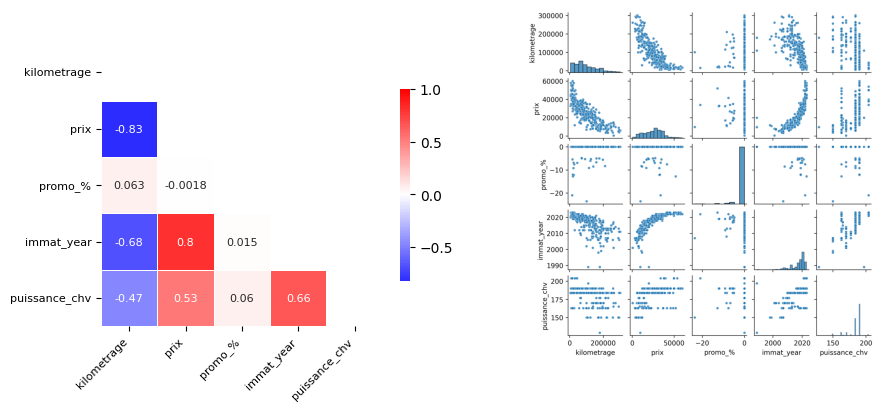

In [73]:
corr_matx_pairplot(df)

Les corrélations les plus élevées concernent le prix, ce qui est pertinent pour notre modèle. Les corélations intra-features sont inférieures à 0.7 ; nous décidons donc de toutes les conserver.

Dans notre contexte, nous n'avons pas beaucoup de feature (8) et ces dernières sont toutes interprétables, il n'apparait donc pas nécessaire d'affiner plus avant la sélection des features. Nous évoquons ci-dessous des techniques pour limiter le nombre de feature : la sélection par la variance et la sélection via un test statistique.

## La variance

Il peut etre pertinent de supprimer des variables sur la base de leur variance (une feature a une variance nulle si sa valeur est identique pour toutes les instances et a donc peu d'intéret pour le modèle).

In [74]:
var_sel = VarianceThreshold(threshold=(0.02))
var_sel.fit(X_train_scl)
print("Selected features:", list(X_train_scl.columns[var_sel.get_support()]))
print("Features to be removed:", list(X_train_scl.columns[~var_sel.get_support()]))

Selected features: ['kilometrage', 'promo_%', 'immat_year', 'puissance_chv', 'transmission_Boîte manuelle', 'carburant_Electrique/Diesel', 'carburant_Electrique/Essence', 'carburant_Essence', 'seller_location_BE', 'seller_location_DE', 'seller_location_ES', 'seller_location_IT', 'seller_location_NL']
Features to be removed: ['transmission_Semi-automatique', 'carburant_Electrique']


In [75]:
#X_train_scl_var = var_sel.transform(X_train_scl)
#X_test_scl_var = var_sel.transform(X_test_scl)

## Test statistique

La fonction SelectKbest permet de sélectionner une nombre spécifique k de features à l'aide d'un test statistique univarié. Sont conservées les features qui ont une relation forte avec la target.

In [76]:
kbest = SelectKBest(score_func=f_regression, k=5)
kbest.fit(X_train_scl, y_train)

print("Selected features:", list(X_train_scl.columns[kbest.get_support()]))
print("Removed features:", list(X_train_scl.columns[~kbest.get_support()]))

Selected features: ['kilometrage', 'immat_year', 'puissance_chv', 'transmission_Boîte manuelle', 'carburant_Electrique/Essence']
Removed features: ['promo_%', 'transmission_Semi-automatique', 'carburant_Electrique', 'carburant_Electrique/Diesel', 'carburant_Essence', 'seller_location_BE', 'seller_location_DE', 'seller_location_ES', 'seller_location_IT', 'seller_location_NL']


In [77]:
#X_train_scl_kbest = kbest.transform(X_train_scl)
#X_test_scl_kbest = kbest.transform(X_test_scl)

Attention avec ces deux méthodes : 
- il semble peu pertinent de supprimer des variables catégorielles (transformées avec One Hot Encoder) sous peine de perdre de l'information
- la sélection des variables numériques devrait probablement être faite avant le preprocessing (scaling)

# Entrainement et sélection du modèle

In [78]:
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_score, learning_curve, GridSearchCV, cross_validate
import statsmodels.api as sm
import time
import mlflow

In [79]:
#permet de disable certain warning lors de la gridsearch
import warnings
warnings.filterwarnings("ignore")

In [80]:
#permet de disable tous les messages d'info donné par MLflow lors du tracking
import logging, sys
logging.disable(sys.maxsize)

Nous sommes sur une problématique de ML supervisé (le prix des véhicules du dataset est connu) et de régression (prediction d'une valeur numérique continue).

Suivant les recommandations de Scikit Learn (*cf. algorithm selection diagram*), nous allons évaluer la performance des modèles suivants:
- Elastic net (régression linéaire régularisée)
- SVR

Une régression linéaire simple servira de benchmark

Pour évaluer la performance des modèles, nous allons nous appuyer sur deux metrics propres à la regression:
- RMSE : moyenne de la somme des écarts entre la valeur prédite par le modèle et la valeur réelle -> plus c'est bas, mieux c'est
- R-squared : indique la proportion de la variance de la target pouvant être expliquée par les features. Valeur comprise entre 0 et 1 -> plus c'est élevé, mieux c'est

## Fonctions

### Fonctions pour évaluer les performances du modèle

Nous allons évaluer les modèles en utilisant la cross-validation
- le trainig set est divisé @ random en 5 subsets (folds),
- le modèle est entrainé & évalué 5 fois : 4 folds sont utilisés pour l'entrainement et 1 pour la validation

Par ailleurs, nous avons réalisé une GridSearch pour finetuner les hyperparamètres des modèles : elle utilise la cross-validation pour évaluer toutes les combinaisons d'hyperparamètres.

*La Randomized search aurait été plus pertinente dans le cas où on explorerait plus de combinaisons (large hyperparameter search space).*

In [81]:
def search_best_model(model, X_train:np.array, y_train:np.array, param=None, mlfow_tracking=None):
   """Fonction qui entraine un modèle et retourne ses performances (cross-validation)
   Il est possible de soumettre des paramètres pour obtenir les résultats d'une gridsearch
   Il est possible d'enregistrer les résultats des modèles via MLflow

   Args:
       model : model sklearn non fitté (ex: LinearRegression())
       X_train (array): features préprocéssées
       y_train (array): target préprocéssée
       param (dict, optional): dictionaire de paramètres à tester pour la Gridsearch. Defaults to None.
       mlfow_tracking (str/int, optional): indique si on souhaite que les essais soient trackés via MLflow. Defaults to None.

   Returns:
       df_comp: un dataframe d'une ligne contenant les résultats obtenus avec le modèle
       best_param: un dictionnaire des meilleurs paramètres issus de la gridsearch

   """
    
   kfold = KFold(n_splits=5, shuffle=True, random_state=42)

   if mlfow_tracking is not None:
      mlflow.set_experiment(f"vehicule_pricer_{type(model).__name__}")
      mlflow.autolog()
   
   if param is not None:
    
       # find best parameters with Gridsearch
      search = GridSearchCV(model, param, scoring='neg_root_mean_squared_error', cv=kfold)
      result = search.fit(X_train, y_train)

       # print results of Gridsearch
      best_score = result.best_score_
      best_param = result.best_params_
      print(f"--{type(model).__name__}--\n")
      print(f"Le meilleur score obtenu avec la GridSearch est un RMSE de {-best_score:.2f} \navec les paramètres {best_param}.\n")
      fit_time = search.cv_results_["mean_fit_time"].mean()

       # compute best score of model based on best params through kfold cv
      model_f = model.set_params(**search.best_params_)
      score_1 = cross_val_score(model_f, X_train, y_train, cv=kfold, scoring='r2')
      print(f"Le R2 moyen de la cross validation est de {score_1.mean():.2f} avec un écart type de {score_1.std():.2f}.")
      score_2 = cross_val_score(model_f, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
      print(f"Le RMSE moyen de la cross validation est de {np.sqrt(-score_2.mean()):.2f} avec un écart type de {np.sqrt(score_2.std()):.2f}.")
      print(f"Fit time: {fit_time:.4f}s")

   else:
      print(f"--{type(model).__name__}--\n")
      score_1 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='r2')
      print(f"Le R2 moyen de la cross validation est de {score_1.mean():.2f} avec un écart type de {score_1.std():.2f}.")
      score_2 = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_mean_squared_error')
      print(f"Le RMSE moyen de la cross validation est de {np.sqrt(-score_2.mean()):.2f} avec un écart type de {np.sqrt(score_2.std()):.2f}.")
      start = time.time()
      model_f = model.fit(X_train, y_train)
      end = time.time()
      fit_time = end - start
      print(f"Fit time: {fit_time:.4f}s")
   
   if mlfow_tracking is not None:
      mlflow.autolog(disable=True)

   #creation d'un dataframe pour pouvoir comparer facilement
   data1={'Model':type(model).__name__,
           'R2_train_score':[score_1.mean()], 
           'RMSE_train_score':[np.sqrt(-score_2.mean())], 
           'Fit_time':[fit_time]}
   df_comp = pd.DataFrame(data1)
    
   if param is not None: 
      return df_comp, best_param
   else:
      return df_comp

In [82]:
def plot_learning_curve(estimator, X_train:np.array, y_train:np.array):
    """plot les performances du modèle en fonction de la taille du dataset pour le training set et le validation set

    Args:
        estimator (_type_): modele sklearn non fitté (ex: LinearRegression())
        X_train (array): features préprocéssées
        y_train (array): target préprocéssée
    """

    train_sizes, train_scores, valid_scores = learning_curve(estimator, X_train, y_train, cv= 10, train_sizes=np.linspace(0.1, 1, 20), scoring='neg_root_mean_squared_error', n_jobs=-1)

    train_mean = -np.mean(train_scores, axis=1)
    train_std = -np.std(train_scores, axis=1)
    valid_mean = -np.mean(valid_scores, axis=1)
    valid_std = -np.std(valid_scores, axis=1)

    score_ = cross_val_score(LinearRegression(), X_train, y_train, cv=10, scoring='neg_root_mean_squared_error')
    baseline_rmse = -score_.mean()

    plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label="training score")
    plt.fill_between(train_sizes, train_mean + train_std, train_mean-train_std, alpha=0.15, color='blue')

    plt.plot(train_sizes, valid_mean, color='green', marker='+', markersize=5, linestyle='--', label='validation score')
    plt.fill_between(train_sizes, valid_mean + valid_std, valid_mean-valid_std, alpha=0.15, color='green')

    if type(estimator).__name__ != "LinearRegression":
        plt.axhline(y=baseline_rmse, color='black', label='baseline rmse')

    plt.title(f"Learning_curve du modele {type(estimator).__name__}")
    plt.xlabel("Training set Size")
    plt.ylabel("RMSE")
    plt.legend(loc="lower right")
    plt.show()

### Fonction une fois le modèle fitté

In [83]:
def fit_model(model, best_para:dict, X_train:np.array, y_train:np.array):
    
    modelf = model.set_params(**best_para)
    modelf.fit(X_train, y_train)

    return modelf

In [84]:
def plot_coef(model_fitted, X_train:np.array, poly=None):
    """visualisation du poids de chaque feature sur la base de leur coefficient

    Args:
        model_fitted (_type_): model sklearn déjà fitté
        X_train (array): features
    """
    
    if type(model_fitted).__name__=='SVR':
        coef = model_fitted.coef_[0]
    else:
        coef = model_fitted.coef_

    print(f"\nMagnitude des coefficients:{np.sum(abs(coef)):,.3f}")
    fig = plt.figure(figsize=(15,4))
    plt.bar(np.arange(len(coef)), coef, color="#1E328F")
    if poly is None:
        plt.xticks(np.arange(len(coef)),X_train.columns, rotation=45, ha='right');
    return(np.sum(abs(coef)))

## Linear Regression

In [85]:
df_linreg = search_best_model(model=LinearRegression(), X_train=X_train_scl, y_train=y_train)

--LinearRegression--

Le R2 moyen de la cross validation est de 0.77 avec un écart type de 0.06.
Le RMSE moyen de la cross validation est de 5565.79 avec un écart type de 3341.86.
Fit time: 0.0007s


In [86]:
linreg =LinearRegression()
linreg.fit(X_train_scl, y_train)
pred = linreg.predict(X_train_scl)
print(f"Training MSE : {mean_squared_error(y_train, pred, squared=False):.2f}")

Training MSE : 4929.42


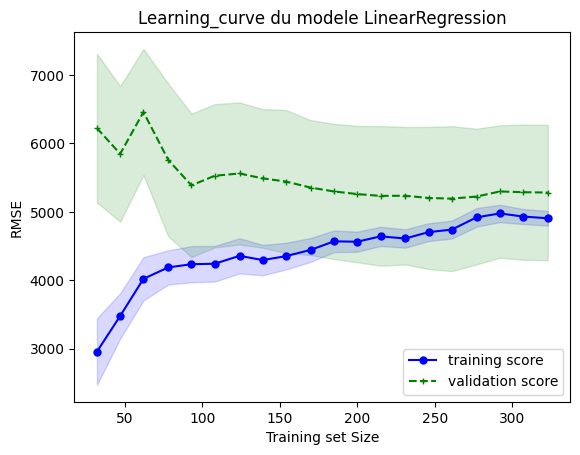

In [87]:
plot_learning_curve(LinearRegression(), X_train_scl, y_train)

Training curve

Quand il y a peu d'instances, le modèle parvient à fitter les datas aux mieux (avec quand meme une erreur de près de 3000€). Au fil de l'ajout de nouvelles instances au training set, le modèle a de plus en plus de mal à les fitter (les données sont *noisy* et peut etre pas linéaires). L'erreur sur le training set augmente donc (jusqu'à se stabiliser autour de 5000€).
L'erreur étant relativement importante (5000€ représente un large % du prix d'une voiture), on peut suspecter que nous sommes dans une situation **d'underfitting** : le modele ne fitte pas les données correctement (modèle probablement trop simple).

Validation curve

Quand le modèle est entrainé sur peu d'instances, il est incapable de généraliser correctement (erreur supérieure à 6000€). Puis, au fil de l'exposition à de nouvelles instances, le modèle apprend et l'erreur de validation diminue. L'erreur atteint rapidement un plateau, assez proche de la courbe du training set.

Les deux courbes étant proches, l'erreur de généralisation est faible. Nous ne sommes donc pas dans une situation d'under/overfitting. Par ailleurs, ajouter de la data ne semble pas non plus être la solution : les courbres semblent avoir atteint un plateau et se rejoindront petit à petit sans améliorer la performance.

Deux problématiques émergent:
- le modèle linéaire est trop simple pour fitter les datas
- l'ajout de nouvelles features pourraient améliorer la situation (ce voudrait dire aller chercher une autre source de données)


Magnitude des coefficients:44,470.279


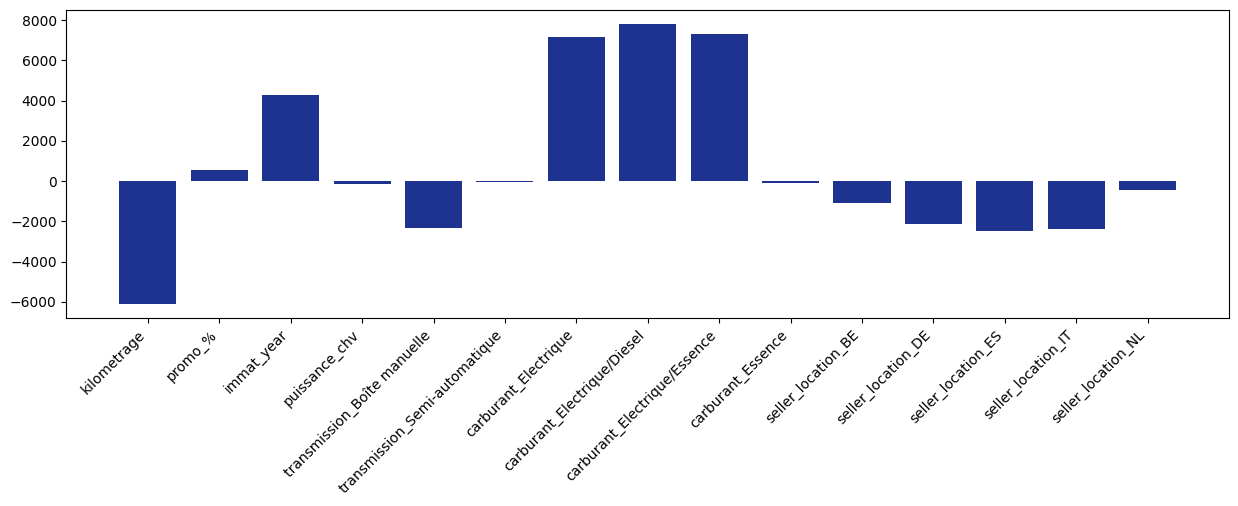

In [88]:
coef_linreg = plot_coef(linreg, X_train_scl)

Les coefficents mettent en évidence l'importance de chacune des features par rapport au prix du véhicule : le kilometrage, l'année d'immatriculation et le type de carburant semblent être les principaux paramètres influençant le prix du véhicule.

### Test statistique pour vérifier qu'il existe une relation entre les features et la target

Pour vérifier qu'il existe bien une relation entre les features et la target nous pouvons vérifier si leur coef = 0.
- Hypothèse nulle H0 : coef1 = coef2 = ... coefn = 0
- Hypothèse alternative Ha : au moins un des coef est non nul

Il faut calculer la F-Statistic ((TSS - RSS)/p) / (RSS/(n-p-1))
- si proche de 1 : pas de relation
- si > 1 : relation


TSS : total sum of square (somme des erreurs au carré)
RSS : residual sum of square
p : nb de feature
n : nb d'instances

In [91]:
X_stat = sm.add_constant(X_train_scl) #An intercept is not included by default and should be added by the user
y = np.asarray(y_train)
X = np.asarray(X_stat)

results = sm.OLS(y.astype('int64'), X.astype('float64')).fit() #necessaire de détailler le type sinon summary ne fonctionne pas
A = np.identity(len(results.params))
A = A[1:,:]
print(results.f_test(A))

<F test: F=105.7139526777966, p=1.3865813190433125e-118, df_denom=343, df_num=15>


In [92]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     105.7
Date:                Sat, 13 Jan 2024   Prob (F-statistic):          1.39e-118
Time:                        14:59:07   Log-Likelihood:                -3562.0
No. Observations:                 359   AIC:                             7156.
Df Residuals:                     343   BIC:                             7218.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.686e+04    676.338     39.715      0.000    2.55e+04    2.82e+04
x1         -6105.5470    401.582    -15.204      0.000   -6895.420   -5315.674
x2           549.2612    278.184      1.974      0.049       2.100    1096.422
x3          4304.0895    486.129      8.854      0.000    3347.920    5260.259
x4          -144.8486    384.662     -0.377      0.707    -901.441     611.744
x5         -2344.8387    868.811     -2.699      0.007   -4053.707    -635.971
x6           -30.3269   5165.903     -0.006      0.995   -1.02e+04    1.01e+04
x7          7179.5581   6225.944      1.153      0.250   -5066.277    1.94e+04
x8          7817.4042   1662.808      4.701      0.000    4546.820    1.11e+04
x9          7325.7247   1633.333      4.485      0.000    4113.116    1.05e+04
x10         -105.9161    807.132     -0.131      0.896   -1693.467    1481.635
x11        -1077.3261   1323.367     -0.814      0.416   -3680.262    1525.610
x12        -2122.3877    785.755     -2.701      0.007   -3667.892    -576.883
x13        -2490.4551   1350.557     -1.844      0.066   -5146.872     165.962
x14        -2405.7594    999.569     -2.407      0.017   -4371.816    -439.703
x15         -466.8356   1119.467     -0.417      0.677   -2668.721    1735.050
==============================================================================
Omnibus:                       90.320   Durbin-Watson:                   1.731
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              241.730
Skew:                           1.184   Prob(JB):                     3.23e-53
Kurtosis:                       6.248   Cond. No.                         44.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Au global, la p value est très proche de 0 (Prob F-Statistic) ==> nous pouvons donc rejeter H0 qui dit qu'il n'y a aucune relation entre le prix et les différentes features. Un test de signification peut nous aider à déterminer si nous devons opter pour un modèle complexe ou un modèle plus simple. Ici une régression linéaire fait sens.

En regardant les p-values des différentes features, on remarque qu'elles ne sont pas toutes < 0.05 (pour alpha 95%) cad que ces variables ne sont pas "statistiquement significatives". Elles pourraient être supprimées pour améliorer la précision du modèle

In [93]:
[X_stat.iloc[:,4].name, X_stat.iloc[:,6].name, X_stat.iloc[:,7].name, X_stat.iloc[:,10].name, X_stat.iloc[:,11].name, X_stat.iloc[:,13].name, X_stat.iloc[:,15].name]

['puissance_chv',
 'transmission_Semi-automatique',
 'carburant_Electrique',
 'carburant_Essence',
 'seller_location_BE',
 'seller_location_ES',
 'seller_location_NL']

La puissance en chevaux ne semble pas être déterminante (le résultat de la p_value pour des valeurs qui ont été one_hot_encodées n'est pas pertinente).

## Elastic Net

Elastic Net permet de limiter l'overfitting d'une regression linéaire en implémentant de la régularisation. En l'occurence ce n'est pas ici un problème : la linear regression semble être un modèle trop simple (au vu des learning curves).

Nous allons quand meme faire tourner le modèle pour illustration.

In [94]:
param_grid = {
    "alpha":[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0], # alpha = 0 is equivalent to an ordinary least square
    'l1_ratio':[0.05, 0.2, 0.4, 0.6, 0.8, 1] # for l1_ratio = 0 the penalty is an L2 penalty. For l1_ratio = 1 it is an L1 penalty
    }

df_elnet, hp_elnet = search_best_model(model=ElasticNet(), param=param_grid, X_train=X_train_scl, y_train=y_train)

--ElasticNet--

Le meilleur score obtenu avec la GridSearch est un RMSE de 5352.68 
avec les paramètres {'alpha': 0.1, 'l1_ratio': 0.8}.

Le R2 moyen de la cross validation est de 0.79 avec un écart type de 0.05.
Le RMSE moyen de la cross validation est de 5427.30 avec un écart type de 3177.65.
Fit time: 0.0015s


In [95]:
elnet = fit_model(ElasticNet(), hp_elnet, X_train_scl, y_train)
pred = elnet.predict(X_train_scl)
print(f"Training MSE : {mean_squared_error(y_train, pred, squared=False):.2f}")

Training MSE : 5004.08


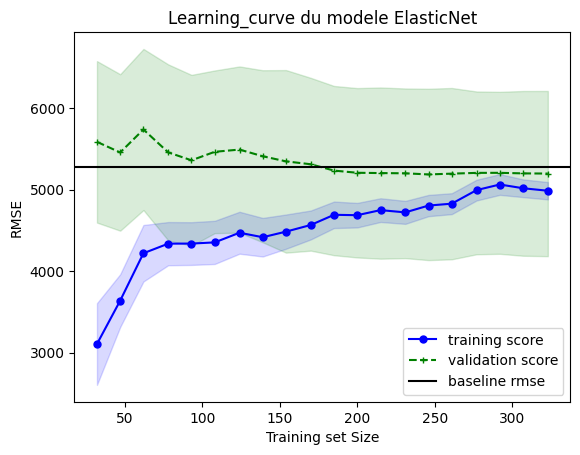

In [96]:
plot_learning_curve(ElasticNet().set_params(**hp_elnet), X_train_scl, y_train)

Les courbes de l'elastic net sont comparées au RMSE de la cross validation de la linear regression (ligne noire).

Les tendances des deux courbes ont des comportements similaires à la celles de la linear regression, avec une erreur légèrement inférieure. Les conclusions sont les mêmes que pour la régression linéaire.


Magnitude des coefficients:28,931.135


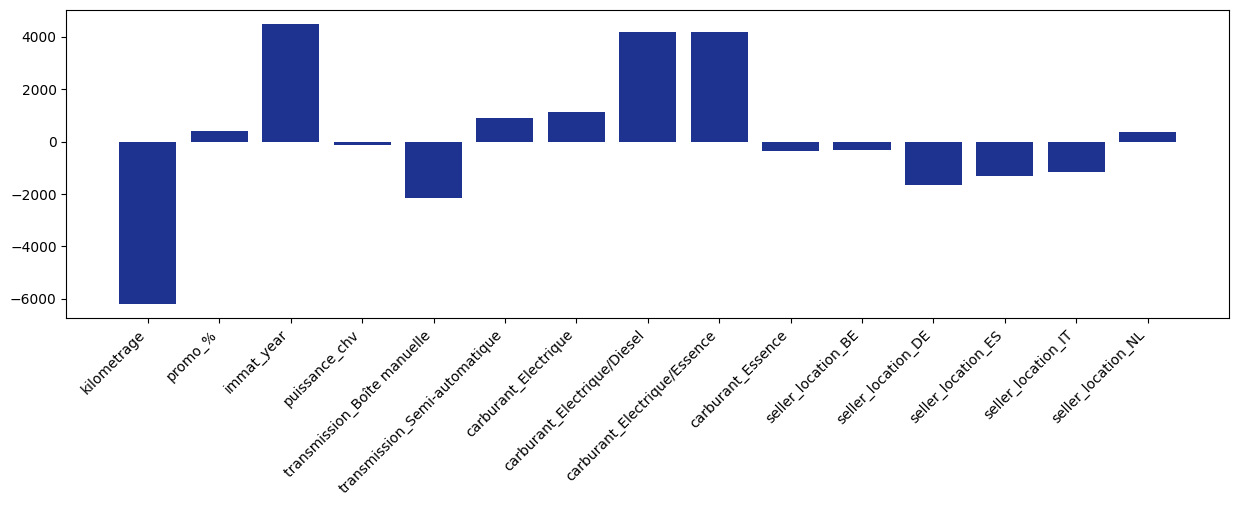

In [97]:
elnet = fit_model(ElasticNet(), hp_elnet, X_train_scl, y_train)
coef_elnet = plot_coef(elnet, X_train_scl)

La régularisation a induit une diminution des coefficients par rapport à la régression linéaire classique (ce qui était attendu).

## Polynomial regression

Dans la mesure ou la linear regression semble etre trop simple pour fitter nos data, nous allons complexifier le modèle en faisant une regression polynomiale.

In [98]:
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scl)
polyreg = LinearRegression()
df_polyreg = search_best_model(model=polyreg, X_train=X_train_poly, y_train=y_train)

--LinearRegression--

Le R2 moyen de la cross validation est de 0.16 avec un écart type de 0.44.
Le RMSE moyen de la cross validation est de 10402.25 avec un écart type de 7065.51.
Fit time: 0.2638s


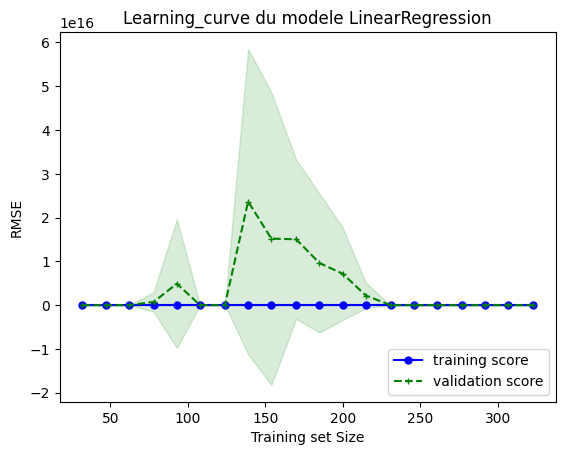

In [99]:
plot_learning_curve(polyreg, X_train_poly, y_train)

La tendances des ces learning curves sont erratiques et laisse à penser que si le modèle fitte très bien les training data, il peut y avoir de l'overfitting.

In [100]:
polyreg.fit(X_train_poly, y_train)
pred = polyreg.predict(X_train_poly)
print(f"Train MSE : {mean_squared_error(y_train, pred, squared=False):.2f}")

Train MSE : 3449.66



Magnitude des coefficients:500,899.441


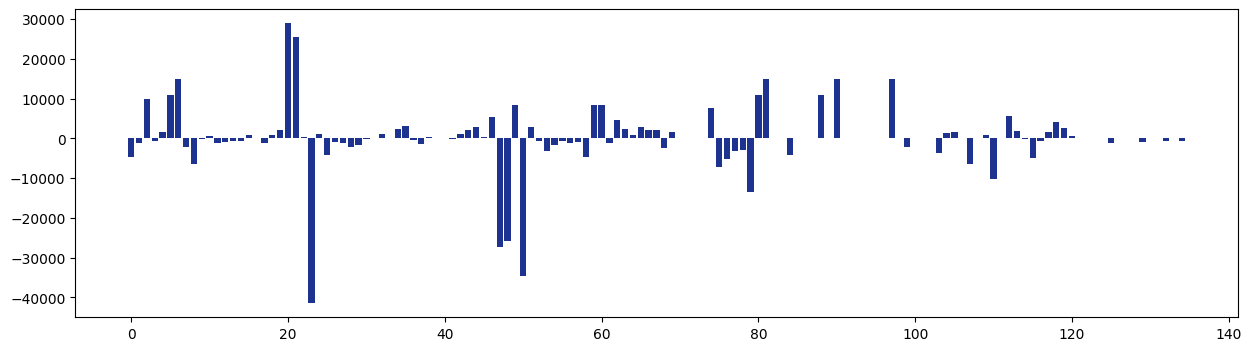

In [101]:
coef_polyreg = plot_coef(polyreg, X_train_poly, poly='yes')

Une polynomiale de degree 2 fait exploser le nombre de features et rend notre modèle beaucoup moins interprétable, ce qui n'est pas souhaitable.

## SVR

In [102]:
param_grid = {
    "kernel":['linear','rbf', 'poly'], 
    'C':[0.1, 1, 10, 100, 1000], # the strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
    'degree':[2,3,4] # degree of the polynomial kernel function.Ignored by all other kernels
    }

df_svr, hp_svr = search_best_model(model=SVR(), param=param_grid, X_train=X_train_scl, y_train=y_train)

--SVR--

Le meilleur score obtenu avec la GridSearch est un RMSE de 5319.85 
avec les paramètres {'C': 1000, 'degree': 2, 'kernel': 'linear'}.

Le R2 moyen de la cross validation est de 0.79 avec un écart type de 0.06.
Le RMSE moyen de la cross validation est de 5423.47 avec un écart type de 3465.54.
Fit time: 0.0025s


In [103]:
svr = fit_model(SVR(), hp_svr, X_train_scl, y_train)
pred = svr.predict(X_train_scl)
print(f"Training MSE : {mean_squared_error(y_train, pred, squared=False):.2f}")

Training MSE : 5161.47


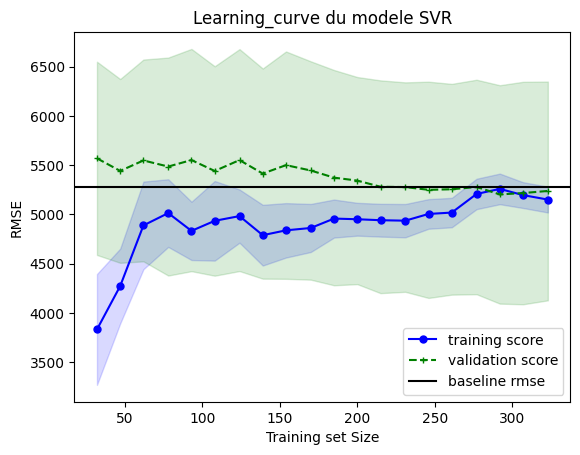

In [104]:
plot_learning_curve(SVR().set_params(**hp_svr), X_train_scl, y_train)

Courbes similaire à régression linéaire et Elastic Net, conclusions identiques


Magnitude des coefficients:29,015.992


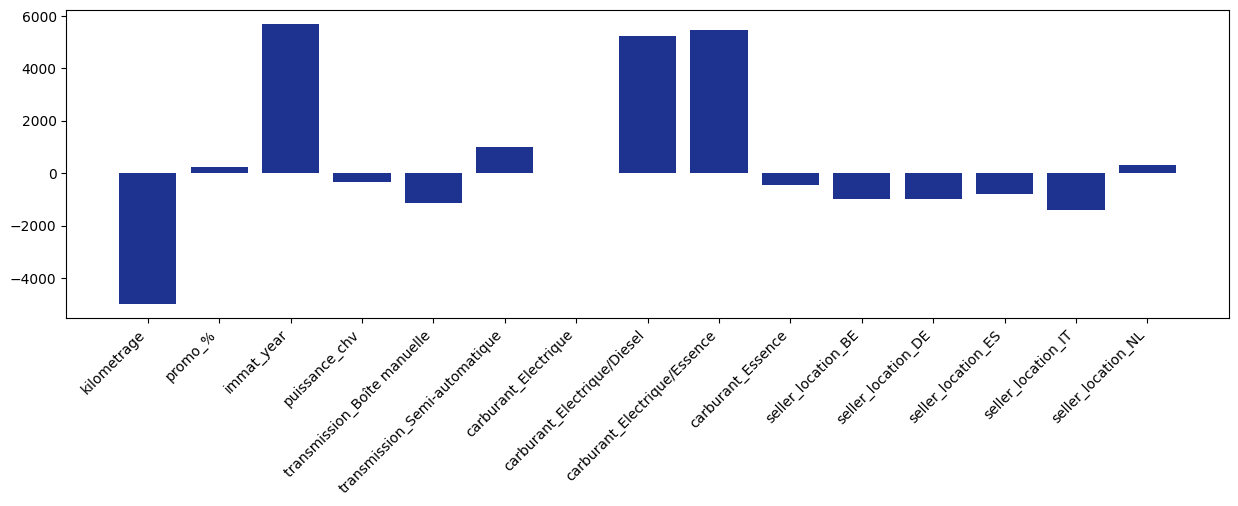

In [105]:
svr = fit_model(SVR(), hp_svr, X_train_scl, y_train)
# les coefs ne peuvent être calculés que pour un kernel linéaire
if svr.get_params()['kernel']=='linear':
    coef_svr = plot_coef(svr, X_train_scl)
else:
    coef_svr=np.nan

## XGBOOST

In [106]:
# on joue dans un premier temps uniquement sur le learning rate car c'est paramètre qui contribue à 80% à la perf
param_grid = {
    "learning_rate":[0.1, 0.2, 0.4, 0.6, 0.8, 1]
    }

df_xgboost, hp_xgboost = search_best_model(model=XGBRegressor(), param=param_grid, X_train=X_train_scl, y_train=y_train)

--XGBRegressor--

Le meilleur score obtenu avec la GridSearch est un RMSE de 4073.57 
avec les paramètres {'learning_rate': 0.1}.

Le R2 moyen de la cross validation est de 0.87 avec un écart type de 0.03.
Le RMSE moyen de la cross validation est de 4088.68 avec un écart type de 1707.32.
Fit time: 0.0446s


In [107]:
# puis on ajoute d'autres paramètres pour voir comment ça évolue - en l'occurence on a choisit un paramètre de régularisation car sinon le modèle a tendance à overfitter
param_grid = {
    "learning_rate":[hp_xgboost['learning_rate']],
    'lambda':[100,120]
    }

df_xgboost2, hp_xgboost2 = search_best_model(model=XGBRegressor(), param=param_grid, X_train=X_train_scl, y_train=y_train)

--XGBRegressor--

Le meilleur score obtenu avec la GridSearch est un RMSE de 4309.15 
avec les paramètres {'lambda': 100, 'learning_rate': 0.1}.

Le R2 moyen de la cross validation est de 0.86 avec un écart type de 0.02.
Le RMSE moyen de la cross validation est de 4329.28 avec un écart type de 1911.88.
Fit time: 0.0414s


In [108]:
xgboost = fit_model(XGBRegressor(), hp_xgboost2, X_train_scl, y_train)
pred = xgboost.predict(X_train_scl)
print(f"Training MSE : {mean_squared_error(y_train, pred, squared=False):.2f}")

Training MSE : 3114.06


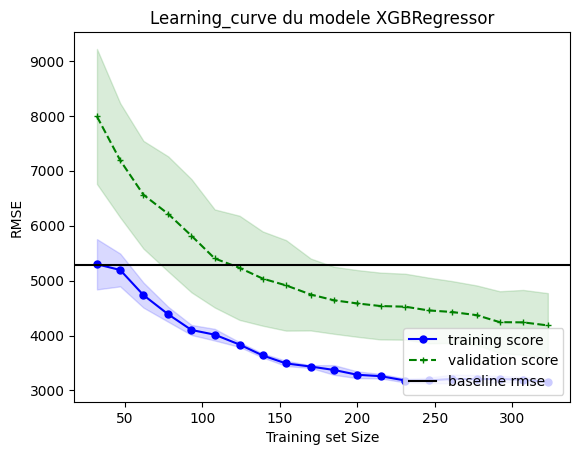

In [109]:
plot_learning_curve(XGBRegressor().set_params(**hp_xgboost2), X_train_scl, y_train)

Le modèle semble beaucoup mieux fitter les données d'entrainement, avec un erreur qui finit autour de 3000€ (vs 5000€ pour les modèles précédents). Le score de validation est bien au dessus du score de training, ce qui est symptomatique de l'existence d'overfitting. Etant donné la tendance des courbes, on peut imaginer qu'avec plus de data le score de validation finirait par rejoindre le score de training. Nous sommes ici plus dans une problématique de manque de data.

In [110]:
xgboost = fit_model(XGBRegressor(), hp_xgboost2, X_train_scl, y_train)
try:
    coef_xgboost = plot_coef(xgboost, X_train_scl)
except:
    coef_xgboost=np.nan

## Comparaison des performances des modèles

In [111]:
df_comp = pd.concat([df_linreg,df_elnet, df_svr, df_xgboost2])
df_comp['coef'] = [coef_linreg, coef_elnet, coef_svr,coef_xgboost]
df_comp = df_comp.sort_values("RMSE_train_score", ascending=True)
df_comp

,Model,R2_train_score,RMSE_train_score,Fit_time,coef
0,XGBRegressor,0.859906,4329.276365,0.041449,NaN
0,SVR,0.787366,5423.469436,0.002453,29015.992234
0,ElasticNet,0.785363,5427.297978,0.001481,28931.134520
0,LinearRegression,0.774881,5565.791134,0.000729,44470.279010


Le choix du modèle oscille entre
- XGRegressor : meilleur perf mais au prix d'un temps d'entrainement élevé (16x plus lent que le SVR, deuxième plus lent)
- Linear Regression : perf comparables à l'Elastic Net/SVR mais avec temps d'entrainement moins élevé (2x plus rapide que ElasticNet, deuxième plus rapide)

**A NOTER : les performances des 3 modèles ne sont pas bonnes (biais élevé)**
- Un RMSE de 4000~5000€ est trop élevé pour évaluer le prix d'un véhicule (le modèle n'est pas suffisamment précis)

In [112]:
print(f"Le meilleur RMSE représente {df_comp['RMSE_train_score'].iloc[0]/y_train.mean()*100:.2f}% du prix moyen des véhicules du training set")

Le meilleur RMSE représente 16.99% du prix moyen des véhicules du training set


Le problème principal rencontré par les algorithmes est la **quantité insuffisante de données**. Un algorithme de ML a besoin de beaucoup de données pour fonctionner correctement. Même pour un problème assez simple comme celui ci, on a généralement besoin de milliers d'exemples.

Dans notre cas d'espece, les données récoltées concernent les informations (1) relatives à un **unique modèle** et (2) disponibles sur un **unique site** : le dataset est donc forcément limité.
- il ne semble pas opportunt d'augmenter la taille du dataset en ajoutant des données relatives à d'autres modèles/marques dans la mesure où la cote des véhicules est propre à chaque modèle
- la solution consisterait à scrapper des offres sur d'autres sites internets qui répertorient ce type d'offres. Deux problèmatiques : (1) de nombreux sites se protègent contre le scrapping (ex: LeBonCoin) et (2) risques de récupérer des offres doublons (cas d'un vendeur qui aurait posté son offre sur plusieurs plateformes) et donc de fausser les modèles.

*Rappel : ce projet avait pour objectif d'appliquer le scrapping de données à un cas concret*

Les autres défis typiques peuvent être écartés :
- données non représentatives (le risque est que le site autoscoot répertorie uniquement des offres 'haut de gamme' par exemple, ce qui limiterait la capacité à généraliser de notre modèle)
- données de mauvaises qualités
- features non pertinentes

# Performance du modèle sélectionné sur le test set

In [ ]:
# if based on specified model on MLflow

#best_model = 'runs:/a30f777c29714a2e99cd4fda2541fb0e/model'
#best_model = mlflow.pyfunc.load_model(best_model)

In [51]:
def evaluation(model_fitted, X_test:np.array, y_test:np.array):
    
    predictions = model_fitted.predict(X_test)
    final_rmse = mean_squared_error(y_test, predictions, squared=False)
    print(f"RMSE: {final_rmse:.2f}")
    print(f"Le RMSE représente {final_rmse/y_test.mean()*100:.2f}% du prix moyen des véhicules du test set")

In [113]:
best_model2 = xgboost
evaluation(best_model2, X_test_scl, y_test)

RMSE: 3506.23
Le RMSE représente 12.66% du prix moyen des véhicules du test set


In [114]:
best_model1 = linreg
evaluation(best_model1, X_test_scl, y_test)

RMSE: 3788.43
Le RMSE représente 13.68% du prix moyen des véhicules du test set


# Pricer

A partir du modèle sélectionné, implémentation d'un pricer.

L'utilisateur complète un certain nombre d'informations concernant son véhicule et obtient sa valeur de marché en retour.

Les informations à compléter sont :
- le kilométrage
- l'année de première immatriculation
- la puissance en chevaux
- le type de transmission
- le type de carburant
- le pays de vente
- le statut du vendeur

In [53]:
from statistics import mean

In [54]:
def pricer(kilometrage:int, year:int, transmission:str, carburant:str, puissance:int, location:str, type_vendeur:str, preprocessing, model_fitted):
    
    # on récupère dans le dictionnaire new_data uniquement les features qui vont servir pour la prédiction (par ex; on ne garde par les features qui ont été supprimé lors du preprocessing)
    new_data = {"kilometrage" : [kilometrage],
                "promo_%" : [0], # cette feature a été donnée au modèle pour qu'il puisse apprendre des patterns (notamment au niveau de la "cote" de certains modèles sur certains marchés), mais ce n'est pas une feature pertinente pour un vendeur qui cherche à connaitre la valeur de marché de son véhicule
                "immat_year" : [year],
                "puissance_chv" : [puissance],
                "transmission":[transmission],
                "carburant":[carburant],
                "seller_location":[location],
                "seller_type":[type_vendeur]}
    
    # on s'assure que l'utilisateur ne fait pas de fautre de frappe et/ou on restreint son panel de choix (il faut que les valeurs prises par les features soient coghérentes avec les données
    # sur lesquelles s'est entrainé le model)
    # on vérifie par rapport à X_train qui a des variables catégorielles (pas encore encodées)
    if transmission not in X_train.transmission.value_counts().index:
        print("Pour le type de transmission, veuillez choisir entre une des valeurs suivantes:")
        print(X_train.transmission.value_counts().index.to_list())
    
    if carburant not in X_train.carburant.value_counts().index:
        print("Pour le type de carburant, veuillez choisir entre une des valeurs suivantes:")
        print(X_train.carburant.value_counts().index.to_list())
    
    # on considère qu'il nous est impossible de répondre à la demande de l'utilisateur si le modèle n'a pas été entrainé sur le type de transmission/caruburant souhaité
    if (transmission not in X_train.transmission.value_counts().index) or (carburant not in X_train.carburant.value_counts().index):
        print("Malheureusement nous ne sommes pas en mesure de vous proposer un prix pour votre véhicule.")
        print("Si vous souhaitez une approximation, veuillez sélectionner une des propositions proposées")
        return
    
    # cas spécifique où le modèle n'a pas été entrainé pour le type de vendeur choisi : on propose la valo pour les autres vendeur du dataset
    if type_vendeur not in X_train.seller_type.value_counts().index:
        print("Nous pouvons uniquement vous proposer un résultat pour le type de vendeur suivant:")
        print(X_train.seller_type.value_counts().index.to_list()[0])
        new_data.update({"seller_type":[X_train.seller_type.value_counts().index[0]]})

    # cas spécifique où le modèle n'a pas été entrainé pour un pays spécifique : on propose une valo pour les différents pays du dataset + moyenne
    if location not in X_train.seller_location.value_counts().index:
        print("Malheureusement nous n'avons pas d'exemple de ce vehicule vendu dans votre pays.")
        print("Pour information, voici le prix que nous proposons pour d'autres pays d'origine\n")

        pred = []
        for code_country in X_train.seller_location.value_counts().index:
            new_data.update({"seller_location":[code_country]})
            X_new = pd.DataFrame(new_data)
            X_new_scl = preprocessing.transform(X_new)
            predictions = model_fitted.predict(X_new_scl)
            pred.append(predictions[0])
            print(f"Etant donné les caractéristiques de ce véhicule, nous préconisons un prix de {predictions[0]:,.2f}€ si vendu en {code_country}\n")
        print(f"Le prix moyen s'élève ainsi à {mean(pred):,.2f}€")

    else : 
        X_new = pd.DataFrame(new_data)
        X_new_scl = preprocessing.transform(X_new)
        predictions = model_fitted.predict(X_new_scl)
        display(X_new.style.hide())
        print(f"Etant donné les caractéristiques de ce véhicule, nous préconisons un prix de {predictions[0]:,.2f}€")

In [115]:
pricer(250000, 2014, "Boîte manuelle", "Diesel", 160, "ES", "Professionnel", preprocessor, best_model2)

kilometrage,promo_%,immat_year,puissance_chv,transmission,carburant,seller_location,seller_type
250000,0,2014,160,Boîte manuelle,Diesel,ES,Professionnel


Etant donné les caractéristiques de ce véhicule, nous préconisons un prix de 12,400.75€


In [116]:
pricer(250000, 2014, "Boîte manuelle", "Diesel", 160, "ES", "Professionnel", preprocessor, best_model1)

kilometrage,promo_%,immat_year,puissance_chv,transmission,carburant,seller_location,seller_type
250000,0,2014,160,Boîte manuelle,Diesel,ES,Professionnel


Etant donné les caractéristiques de ce véhicule, nous préconisons un prix de 6,492.61€
